In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Sigmoid fonksiyonu: Lojistik regresyonda tahmin olasılıklarını hesaplamak için son katmanda kullanılır.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Lojistik Regresyon sınıfı (Gradient Descent kullanarak eğitiyoruz)
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr                  # Öğrenme oranı
        self.num_iter = num_iter      # İterasyon sayısı
        self.fit_intercept = fit_intercept  # Intercept (bias) ekle
        self.verbose = verbose        # İterasyon sırasında cost yazdırma
    
    # Veriye intercept (sabit terim) ekleme
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    # Lojistik regresyonun kayıp fonksiyonu (logaritmik kayıp olacak şekilde)
    def cost_function(self, h, y):
        return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    
    # Modeli eğitim verisi üzerinde eğitme (fit)
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        # Ağırlıkları sıfırdan başlatma
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)   # Doğrusal kombinasyon
            h = sigmoid(z)              # Olasılık tahmini
            gradient = np.dot(X.T, (h - y)) / y.size  # Gradyan hesaplama
            self.theta -= self.lr * gradient          # Ağırlıkları güncelleme
            
            # Her 10000 adımda cost'u yazdır
            if self.verbose and i % 10000 == 0:
                print(f'Iteration {i} cost: {self.cost_function(h, y)}')
    
    # Tahmin olasılıklarını hesaplama
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)
        return sigmoid(np.dot(X, self.theta))
    
    # Sınıf tahmini  yapma, eşik değeri varsayılan olarak 0.5 bunun üstündeki 1 sınıfından olacak
    def predict(self, X, threshold=0.5):
        return self.predict_prob(X) >= threshold


In [3]:
data = pd.read_excel("/kaggle/input/pumpkin-seeds-dataset/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx")
data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [4]:
from sklearn.preprocessing import LabelEncoder

# encoder sınıfından nesne oluşturma
le = LabelEncoder()

for column in data.columns:
    if data[column].dtype == "object" :
        data[f"{column}"] = le.fit_transform(data[f"{column}"])
        print("This column has changed : ", column)

This column has changed :  Class


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Separate features and target (assume target is in the last column)
X = data.iloc[:, :-1]
y = data['Class']

# Normalize only the features
scaler = MinMaxScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2,random_state=101, stratify=y)


In [6]:
model = LogisticRegression()

In [7]:
import time

In [8]:
start_time = time.time()

model.fit(X_train, y_train)
#Kaggle CPU'su kullanıldı
end_time = time.time()
net_zaman = end_time - start_time
print("Geçen zaman: {:.4f} saniye".format(net_zaman))

Geçen zaman: 21.2943 saniye


In [9]:
predictions= model.predict(X_test)
predictions

array([ True,  True, False,  True,  True, False, False, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False,  True, False,  True,
       False,  True, False, False, False, False, False, False,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True, False, False, False,  True, False,
       False,  True, False, False, False,  True,  True, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False,  True, False, False,  True, False, False,  True, False,
        True, False, False, False, False,  True, False, False, False,
       False,  True,

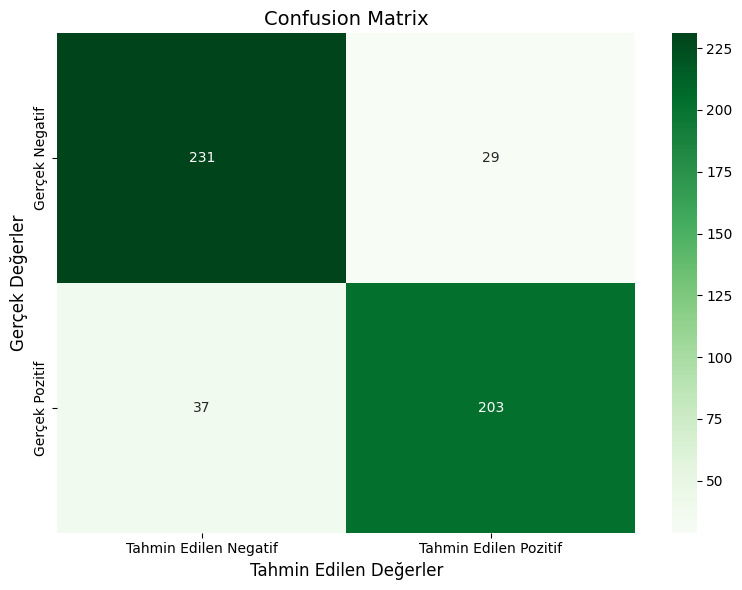

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

# Confusion matrisi oluşturma
cm = metrics.confusion_matrix(y_test, predictions)

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=['Tahmin Edilen Negatif', 'Tahmin Edilen Pozitif'],
            yticklabels=['Gerçek Negatif', 'Gerçek Pozitif'])

plt.ylabel('Gerçek Değerler', fontsize=12)
plt.xlabel('Tahmin Edilen Değerler', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)
plt.tight_layout()
plt.show()

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.868
Precision: 0.875
Recall: 0.8458333333333333
F1 Score: 0.8601694915254238
